In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

# What types of coffee are purchased?

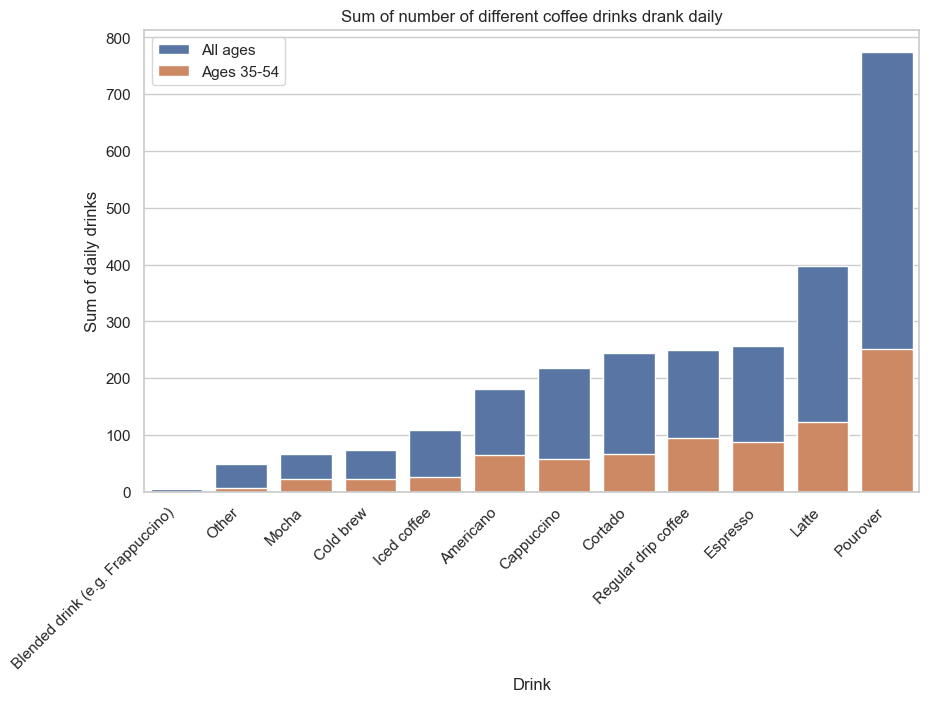

In [2]:
df = pd.read_csv('data/coffee_cleaned.csv', index_col='Submission ID')

# since im asking about prefered I 
drinks = df.groupby(by=['fav_drink']).agg({'num_cups_daily': 'sum'}).rename(columns={'num_cups_daily': 'sum'})
drinks = drinks.sort_values(by='sum', ascending=True)

include = ['35-44 years old', '45-54 years old']
drinks_35_54 = df[df['age'].isin(include)]
drinks_35_54 = drinks_35_54.groupby(by=['fav_drink']).agg({'num_cups_daily': 'sum'}).rename(columns={'num_cups_daily': 'sum'})
drinks_35_54 = drinks_35_54.sort_values(by='sum', ascending=True)

# make plots
plt.figure(figsize=(10, 6))
plt.title('Sum of number of different coffee drinks drank daily')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of daily drinks')
plt.xlabel('Drink')
sns.barplot(drinks, x='fav_drink', y='sum', label='All ages')
sns.barplot(drinks_35_54, x='fav_drink', y='sum', label='Ages 35-54')
plt.legend()
plt.show()

## Purchased drinks with all espressos grouped

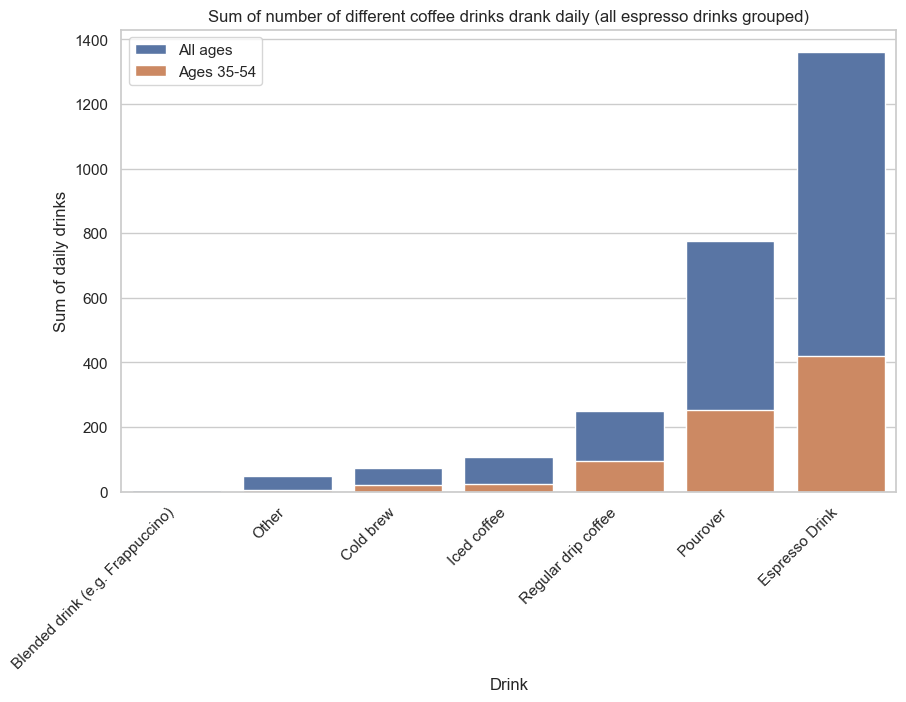

In [3]:
def group_espresso(df):
    
    espresso_grouped = df.groupby('is_espresso').agg({'num_cups_daily': 'sum'}).rename(columns={'num_cups_daily': 'sum'})
    espresso_grouped = espresso_grouped[espresso_grouped.index == True]
    count = espresso_grouped.iloc[0, 0]
    
    # remove espresso drinks from drinks df and group remaining drinks 
    no_espresso = df[df['is_espresso'] == False]
    no_espresso = no_espresso.groupby(by=['fav_drink']).agg({'num_cups_daily': 'sum'}).rename(columns={'num_cups_daily': 'sum'})
    
    # add the new row of espresso drinks
    # create row to add 
    new_row = pd.DataFrame([{"fav_drink": "Espresso Drink", "sum": count}]).set_index('fav_drink')
    
    # append the new row to the DataFrame
    edrinks = pd.concat([new_row , no_espresso], ignore_index=False)
    edrinks = edrinks.sort_values(by='sum', ascending=True)
    return edrinks

# get all ages grouped espresso
espresso_all = group_espresso(df)

# get 35-54 grouped espresso
include = ['35-44 years old', '45-54 years old']
df_35 = df[df['age'].isin(include)]
espresso_35_54 = group_espresso(df_35)

# make plots
plt.figure(figsize=(10, 6))
plt.title('Sum of number of different coffee drinks drank daily (all espresso drinks grouped)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of daily drinks')
plt.xlabel('Drink')
sns.barplot(espresso_all, x='fav_drink', y='sum', label='All ages')
sns.barplot(espresso_35_54, x='fav_drink', y='sum', label='Ages 35-54')
plt.legend()
plt.show()

# Flavours

/var/folders/c2/_110d8_s4vn9y6vnbsf4jh9r0000gn/T/ipykernel_17272/2161383356.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


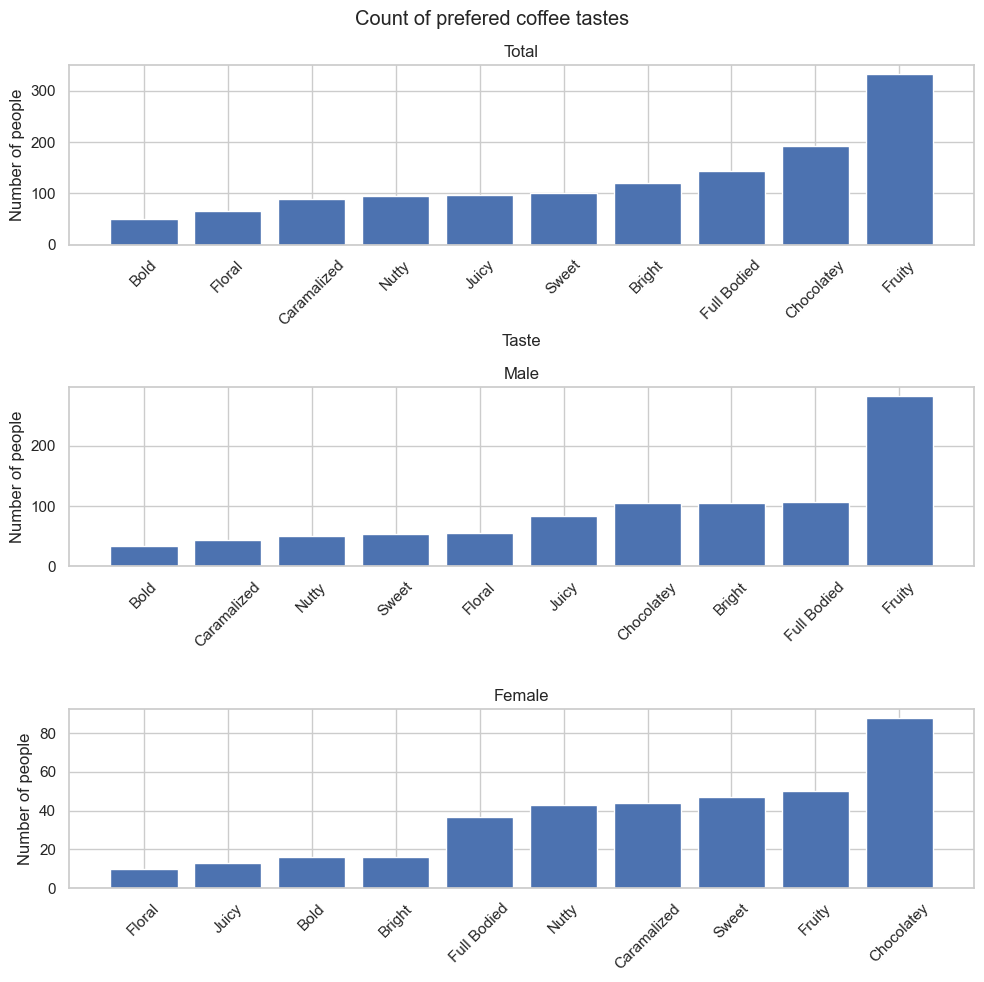

In [6]:
# grouping by flavour and gender (I think there would be bigish preference between male and female?)
# also excluding other and non-binary due to relatively small sample sizes
exclude = ['Other','Non-binary']

mf_df = df[~df['Gender'].isin(exclude)]

# count here because I just wanna know their preference
flav_group = mf_df.groupby(by=['taste','Gender']).agg({'num_cups_daily': 'count'}).rename(columns={'num_cups_daily': 'count'}).reset_index()

total = flav_group.groupby(by=['taste']).agg({'count': 'sum'}).sort_values(by=['count']).reset_index()
males = flav_group[flav_group['Gender'] == 'Male'].sort_values(by=['count'])
females = flav_group[flav_group['Gender'] == 'Female'].sort_values(by=['count'])

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.suptitle('Count of prefered coffee tastes')

# plot total preferences
ax1.bar(total['taste'], total['count'])
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Total')
ax1.set_ylabel('Number of people')
ax1.set_xlabel('Taste')

# plot male preferences
ax2.bar(males['taste'], males['count'])
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Male')
ax2.set_ylabel('Number of people')
ax1.set_xlabel('Taste')

# plot female preferences
ax3.bar(females['taste'], females['count'])
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Female')
ax3.set_ylabel('Number of people')
ax1.set_xlabel('Taste')

plt.tight_layout()
fig.show()

/var/folders/c2/_110d8_s4vn9y6vnbsf4jh9r0000gn/T/ipykernel_17272/1590695566.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


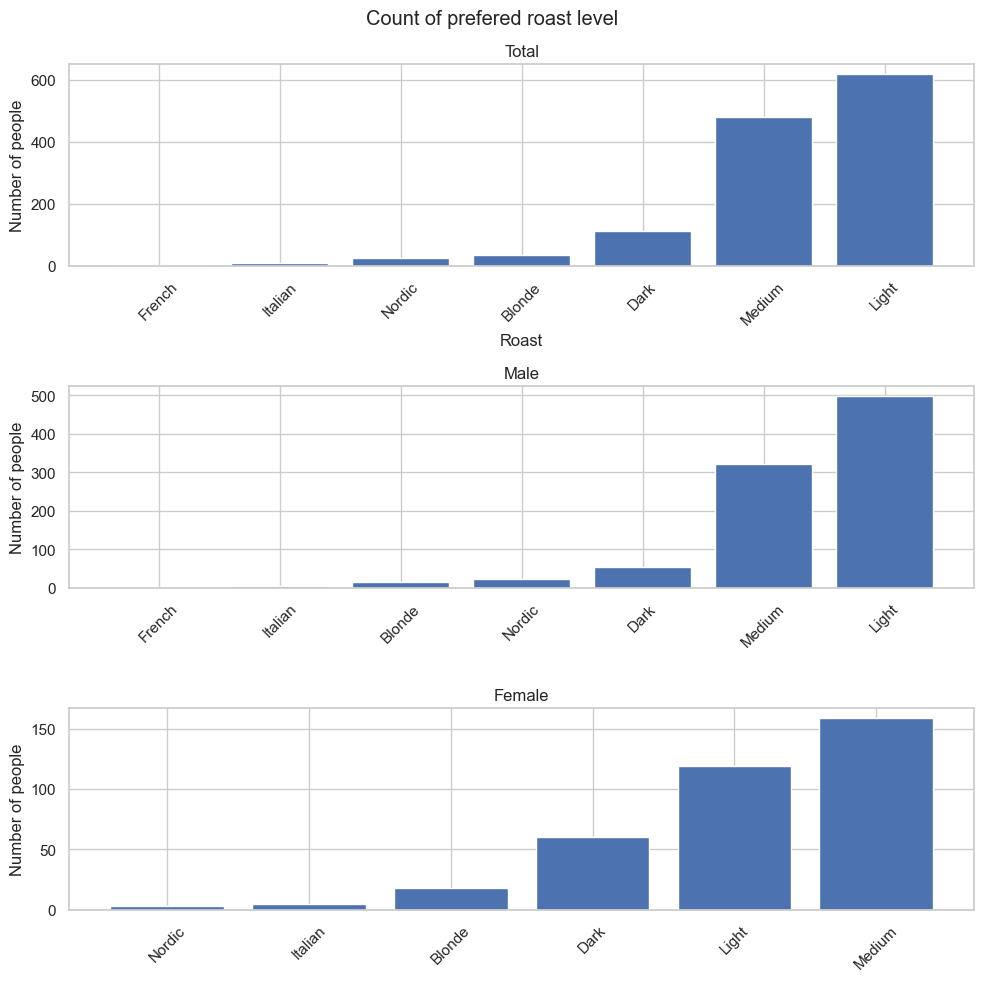

In [7]:
# roast grouping
# also excluding other and non-binary due to relatively small sample sizes
exclude = ['Other','Non-binary']

mf_df = df[~df['Gender'].isin(exclude)]

# count here because I just wanna know their preference
flav_group = mf_df.groupby(by=['pref_roast','Gender']).agg({'num_cups_daily': 'count'}).rename(columns={'num_cups_daily': 'count'}).reset_index()

total = flav_group.groupby(by=['pref_roast']).agg({'count': 'sum'}).sort_values(by=['count']).reset_index()
males = flav_group[flav_group['Gender'] == 'Male'].sort_values(by=['count'])
females = flav_group[flav_group['Gender'] == 'Female'].sort_values(by=['count'])

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.suptitle('Count of prefered roast level')

# plot total preferences
ax1.bar(total['pref_roast'], total['count'])
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Total')
ax1.set_ylabel('Number of people')
ax1.set_xlabel('Roast')

# plot male preferences
ax2.bar(males['pref_roast'], males['count'])
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Male')
ax2.set_ylabel('Number of people')
ax1.set_xlabel('Roast')

# plot female preferences
ax3.bar(females['pref_roast'], females['count'])
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Female')
ax3.set_ylabel('Number of people')
ax1.set_xlabel('Roast')

plt.tight_layout()
fig.show()